# Step 1 : Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #for plotting 
import seaborn as sns   #for Plotting 

from sklearn.preprocessing import StandardScaler  # standard Scaling
from sklearn.ensemble import RandomForestClassifier  #Random Forest Classifier
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score


In [2]:
wine_df = pd.read_csv('winequality-red.csv')
print("Dataset shape: ",wine_df.shape)
#Checking Data Distribution
wine_df.head()

Dataset shape:  (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#It is clear from Dataset Shape we have 12 columns and 1599 rows 
#below info about Data Cloumns
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### we can see there is no null value and string value, we can directly start ploting the graph

####  Data Visualization and Preprocessing 

In [4]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Step 2 : PLOTING GRAPHS FOR BETTER INSIGHT TO DATA DISTRIBUTION

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

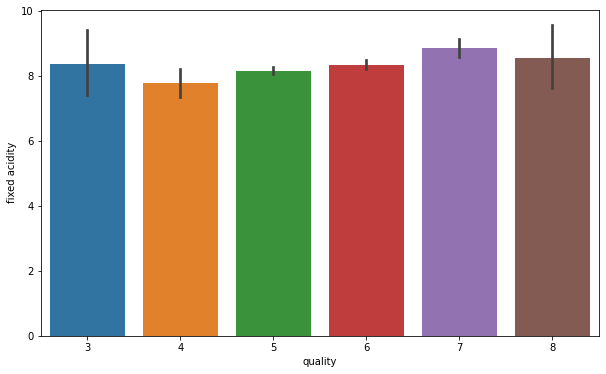

In [5]:
#1 Fixed acidity v/s quality
plt.figure(figsize =(10,6))
sns.barplot(x= 'quality',y ='fixed acidity',data= wine_df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

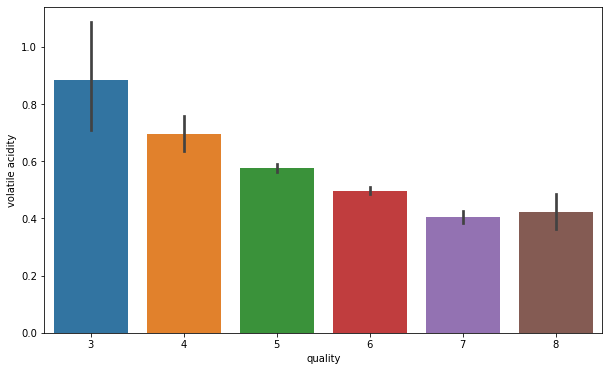

In [6]:
#2 volatile acidity v/s quality
plt.figure(figsize =(10,6))
sns.barplot(x= 'quality',y ='volatile acidity',data= wine_df)

#### There is downing trend in the above plot

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

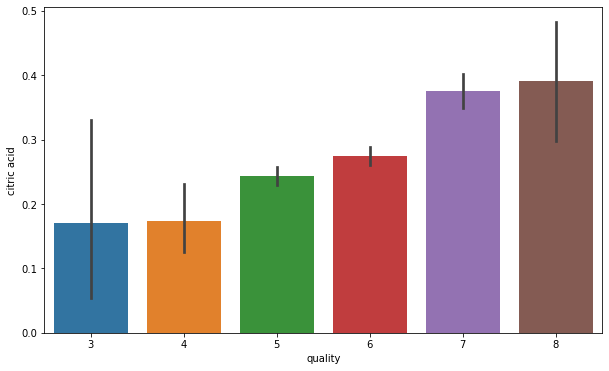

In [7]:
#3 Citric acid v/s quality
plt.figure(figsize =(10,6))
sns.barplot(x= 'quality',y ='citric acid',data= wine_df)

#### There is a increasing trend in the above plot

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

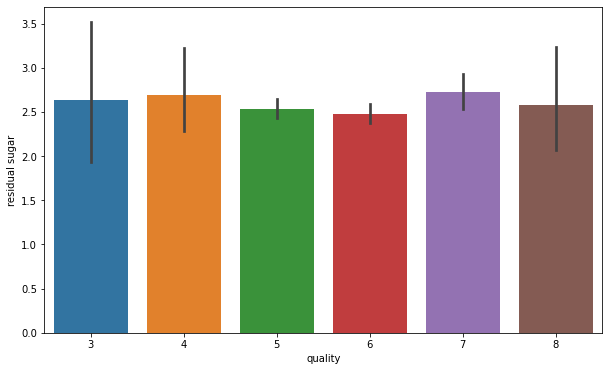

In [8]:
#4 residual sugar v/s quality
plt.figure(figsize =(10,6))
sns.barplot(x= 'quality',y ='residual sugar',data= wine_df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

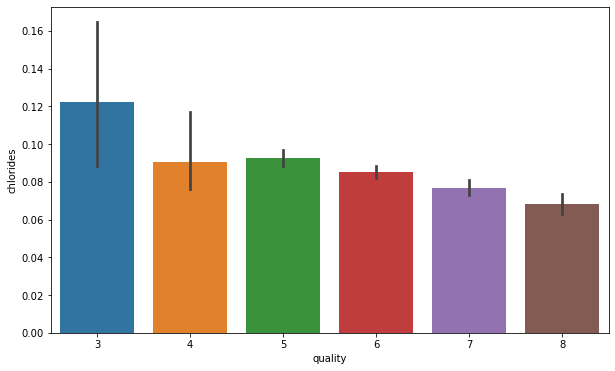

In [9]:
#5 chlorides v/s quality
plt.figure(figsize =(10,6))
sns.barplot(x= 'quality',y ='chlorides',data= wine_df)

#### There is a decreasing trend in the above plot

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

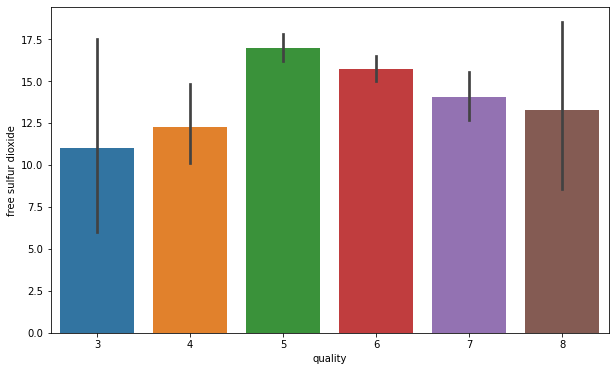

In [10]:
#6 free sulfur dioxide v/s quality
plt.figure(figsize =(10,6))
sns.barplot(x= 'quality',y ='free sulfur dioxide',data= wine_df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

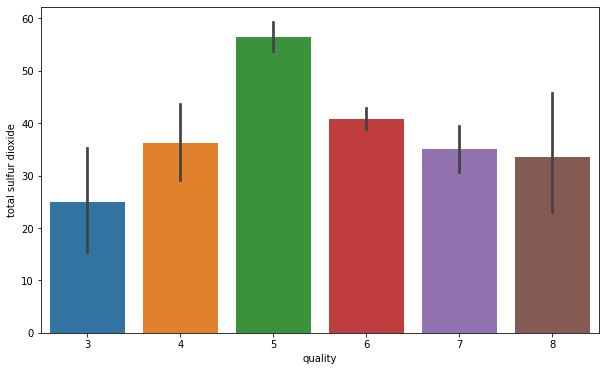

In [11]:
#7 total sulfur dioxide v/s quality
plt.figure(figsize =(10,6))
sns.barplot(x= 'quality',y ='total sulfur dioxide',data= wine_df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

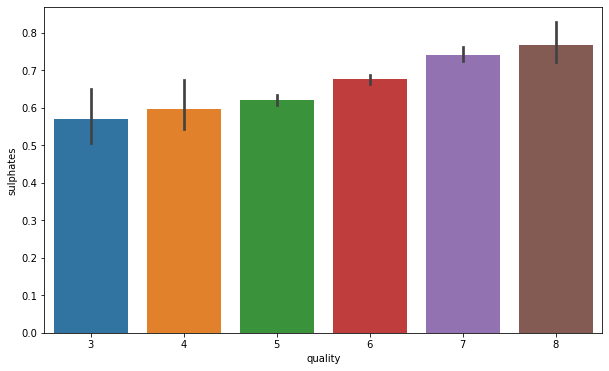

In [12]:
#8 density  v/s quality
plt.figure(figsize =(10,6))
sns.barplot(x= 'quality',y ='sulphates',data= wine_df)

#### There is a increasing trend in the above plot

<AxesSubplot:xlabel='quality', ylabel='pH'>

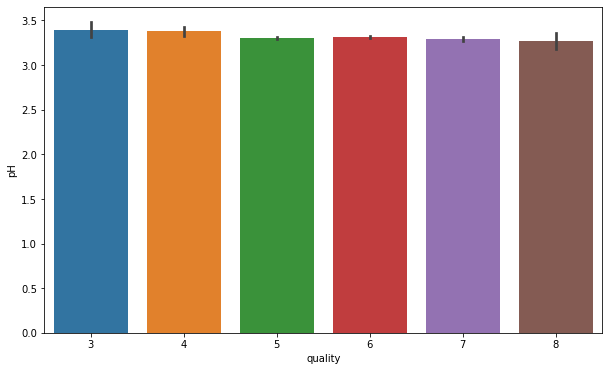

In [13]:
#9 pH v/s quality
plt.figure(figsize =(10,6))
sns.barplot(x= 'quality',y ='pH',data= wine_df)

#### There is a increasing trend in the above plot

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

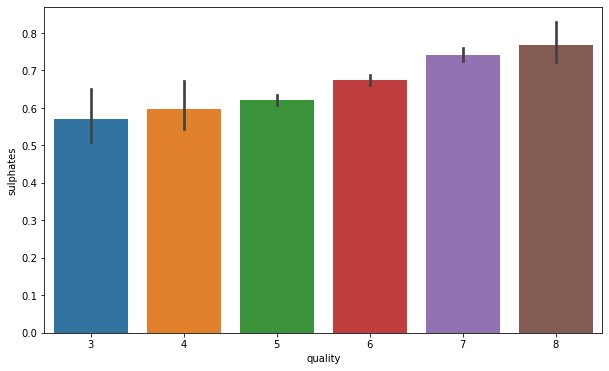

In [14]:
#10 sulphates v/s quality
plt.figure(figsize =(10,6))
sns.barplot(x= 'quality',y ='sulphates',data= wine_df)

#### There is a increasing trend in the above plot

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

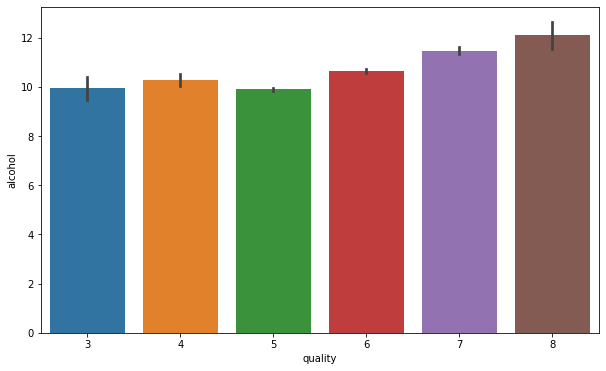

In [15]:
#11 alcohol v/s quality
plt.figure(figsize =(10,6))
sns.barplot(x= 'quality',y ='alcohol',data= wine_df)

#### There is a decreasing (Sliently) trend in the above plot

# Step 3 : PRE-PROCESSING DATA FOR ML ALGORITHM

In [16]:
# dependent variable (wine quality) Our task is to classify good or bad 
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [17]:
#Classifying the wine quality as good or bad based on its quality 
# 'Bad' or 0 if quality of lies in the range (3,6) (inclusive)
# 'Good' or 1 if quality of lies in the range (7,8) (inclusive)
wine_df['quality'] = wine_df['quality'].apply(lambda x: 1 if x > 6.5 else 0)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


0    1382
1     217
Name: quality, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

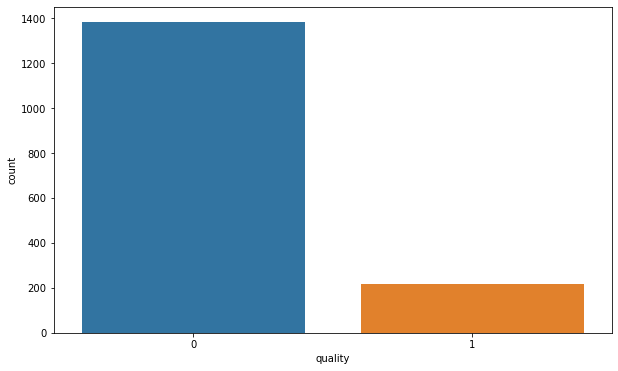

In [18]:
print (wine_df['quality'].value_counts())

fig = plt.figure(figsize =(10,6))
sns.countplot(wine_df['quality'])

In [19]:
#Separting to Dependent and Independent Variables 
x = wine_df.iloc[:, :-1].values
y = wine_df.iloc[:, -1].values

In [20]:
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [21]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
# Splitting the  into the Train sets and Test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print("x-train Shape: ",x_train.shape)
print("x-test Shape: ", x_test.shape)
print("y-train Shape: ",y_train.shape)
print("y-test Shape",y_test.shape)

x-train Shape:  (1279, 11)
x-test Shape:  (320, 11)
y-train Shape:  (1279,)
y-test Shape (320,)


In [23]:
# As we have lot of Data Variations. Therefore we will use Standard Scaling which will scale them in 0 and 1 

sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

# Step 4 : CREATING ML ALGORITHMS

#### (1) RANDOM FOREST CLASSIFIER



In [24]:
# creating Random Forest classifier Instance 
rf_regressor = RandomForestClassifier(n_estimators = 100)

# Fitting the classifier with training data 
rf_regressor.fit(x_train_scaled, y_train)

# Predicting using classifier 
y_prod = rf_regressor.predict(x_test_scaled)

[[265   8]
 [ 21  26]]


<Figure size 720x432 with 0 Axes>

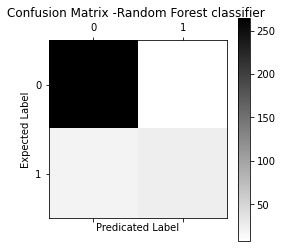

In [25]:
# confusion matrix using the Random Forest classifier

cm = confusion_matrix(y_test,y_prod)
print(cm)

# Matplot for Confusion Matrix of Random Forest Classifier
fig = plt.figure(figsize =(10,6))
plt.matshow(cm, cmap = plt.cm.binary, interpolation = 'nearest')
plt.title("Confusion Matrix -Random Forest classifier ")
plt.colorbar()
plt.ylabel("Expected Label")
plt.xlabel("Predicated Label")
plt.show()

In [26]:
print("Total Predications: ",len(y_prod))
print("Correct Predications: ",sum(y_prod == y_test))
print("Incorrect Predications: ",sum(y_prod != y_test))
print("Accuracy:",sum(y_prod == y_test)*100/len(y_prod),"%")

Total Predications:  320
Correct Predications:  291
Incorrect Predications:  29
Accuracy: 90.9375 %


#### (2) Support Vector Classifier (SVC)

In [27]:
# creating Support Vector Classifier Instance 
svc_regressor = SVC()

# Fitting the classifier with training data 
svc_regressor.fit(x_train_scaled, y_train)

# Predicting using classifier 
y_prod = svc_regressor.predict(x_test_scaled)


[[268   5]
 [ 35  12]]


<Figure size 720x432 with 0 Axes>

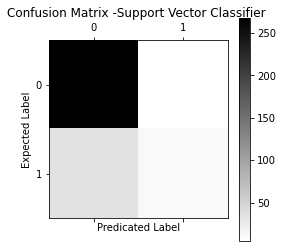

In [28]:
# confusion matrix using the Support Vector Classifier

cm = confusion_matrix(y_test,y_prod)
print(cm)

# Matplot for Confusion Matrix of Random Forest Classifier
fig = plt.figure(figsize =(10,6))
plt.matshow(cm, cmap = plt.cm.binary, interpolation = 'nearest')
plt.title("Confusion Matrix -Support Vector Classifier ")
plt.colorbar()
plt.ylabel("Expected Label")
plt.xlabel("Predicated Label")
plt.show()

In [29]:
print("Total Predications: ",len(y_prod))
print("Correct Predications: ",sum(y_prod == y_test))
print("Incorrect Predications: ",sum(y_prod != y_test))
print("Accuracy:",sum(y_prod == y_test)*100/len(y_prod),"%")

Total Predications:  320
Correct Predications:  280
Incorrect Predications:  40
Accuracy: 87.5 %


# Step 5 : TUNNING ML ALGORITHM

In [30]:
#Finding parameters for the SVC model
param = {
    'C':[0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
    'kernel':['linear','rbf'],
    'gamma':[0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]    
}

grid_svc = GridSearchCV(svc_regressor,param_grid = param,scoring = 'accuracy',cv = 10)

In [31]:
grid_svc.fit(x_train_scaled,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [32]:
print("Best Parameters for SVC :  ",grid_svc.best_params_)

Best Parameters for SVC :   {'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}


Confusion Matrix : 
 [[268   5]
 [ 35  12]]


<Figure size 720x432 with 0 Axes>

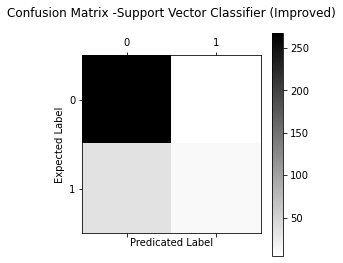

Total Predications:  320
Correct Predications:  287
Incorrect Predications:  33
Accuracy: 89.6875 %


In [33]:
#Support Vector Classifier (SVC)
svc_regressor2 = SVC(C = 1.2, gamma = 0.9, kernel = 'rbf')

svc_regressor2.fit(x_train_scaled, y_train)

    
y_prod2 = svc_regressor2.predict(x_test_scaled)

cm_svc2 = confusion_matrix(y_test,y_prod)
print('Confusion Matrix : \n',cm_svc2)

# Matplot for Confusion Matrix of Random Forest Classifier
fig = plt.figure(figsize =(10,6))
plt.matshow(cm, cmap = plt.cm.binary, interpolation = 'nearest')
plt.title("Confusion Matrix -Support Vector Classifier (Improved)\n ")
plt.colorbar()
plt.ylabel("Expected Label")
plt.xlabel("Predicated Label")
plt.show()

print("Total Predications: ",len(y_prod2))
print("Correct Predications: ",sum(y_prod2 == y_test))
print("Incorrect Predications: ",sum(y_prod2 != y_test))
print("Accuracy:",sum(y_prod2 == y_test)*100/len(y_prod),"%")

In [34]:
#RANDOM FOREST CLASSIFIER
rf_eval = cross_val_score(estimator = rf_regressor, X = x_train_scaled, y = y_train,cv=10)
rf_eval.mean()

0.9101008858267716

# Step 6 : RESULT
#### 1) We had created ML Classfiers for Classfying wind as good or bad 
#### 2) The Dataset contains 1599 records and 12 fields 
#### 3) Random Forest Classifiers classified with an accuracy of 88%(approx.) and 91%(approx.) after tunning. 
#### 4) SVC classifier with an accuracy of 87%(approx.) and 89%(approx.) after tunning. 
    